# Imports

## Installations 

##### uncomment next cells if you don't have packages installed already

In [6]:
#!pip install datashader

In [7]:
#!pip install geopandas

In [9]:
#!pip install xarray-spatial

In [156]:
#!pip install shapely

In [13]:
#!pip install spatialpandas

In [157]:
import datashader as ds
import numpy as np
import pandas as pd
import datashader as ds
import geopandas as gpd
import matplotlib.pyplot as plt
import colorcet

from datashader.transfer_functions import stack
from datashader.transfer_functions import shade
from datashader.transfer_functions import set_background
from datashader.colors import inferno

from shapely import wkt

from xrspatial.classify import natural_breaks
from xrspatial.classify import binary
from xrspatial import proximity

from spatialpandas import GeoDataFrame

# Loading Data

In [49]:
stations_df = pd.read_csv("EV_Stations.csv")

## converting those columns to floats and getting rid of any non-numeric entries
stations_df["Latitude"] = pd.to_numeric(stations_df["Latitude"], errors = 'coerce')
stations_df["Longitude"] = pd.to_numeric(stations_df["Longitude"], errors = 'coerce')
stations_df["Longitude"].isna().sum()

stations_df = stations_df.dropna(subset = ["Latitude", "Longitude"])


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,12,13,27,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0

In [50]:
stations_raster = cvs.points(stations_df, 'Longitude', 'Latitude')
stations_raster

<xarray.DataArray (Latitude: 800, Longitude: 1600)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
Coordinates:
  * Longitude  (Longitude) float64 -124.8 -124.8 -124.8 ... -66.98 -66.94 -66.9
  * Latitude   (Latitude) float64 24.41 24.44 24.47 24.51 ... 49.31 49.34 49.37

In [218]:
counties = gpd.read_file("CA_Counties_TIGER2016.shp")

In [219]:
counties.to_csv("count2")

In [220]:
count2 = pd.read_csv('count2')

In [221]:
count2["geometry"] = count2["geometry"].apply(str)

In [222]:
count2['geometry'] = count2['geometry'].apply(wkt.loads)

#count2["geometry"] = str(count2["geometry"])

my_geo_df = gpd.GeoDataFrame(count2, geometry = "geometry")

In [223]:
my_geo_df

,Unnamed: 0,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,0,6,91,277310,6091,Sierra,Sierra County,6,H1,G4020,NaN,NaN,NaN,A,2468694587,23299110,39.576925,-120.521993,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,1,6,67,277298,6067,Sacramento,Sacramento County,6,H1,G4020,472.0,40900.0,NaN,A,2499183617,76073827,38.450011,-121.340441,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,2,6,83,277306,6083,Santa Barbara,Santa Barbara County,6,H1,G4020,NaN,42200.0,NaN,A,7084000598,2729814515,34.537057,-120.039973,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,3,6,9,1675885,6009,Calaveras,Calaveras County,6,H1,G4020,NaN,NaN,NaN,A,2641820834,43806026,38.183900,-120.561442,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,4,6,111,277320,6111,Ventura,Ventura County,6,H1,G4020,348.0,37100.0,NaN,A,4773390489,945942791,34.358742,-119.133143,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."
5,5,6,37,277283,6037,Los Angeles,Los Angeles County,6,H1,G4020,348.0,31080.0,31084.0,A,10510651024,1794730436,34.196398,-118.261862,"MULTIPOLYGON (((-13210018.388 3958856.141, -13..."
6,6,6,97,1657246,6097,Sonoma,Sonoma County,6,H1,G4020,488.0,42220.0,NaN,A,4081437574,497508807,38.525182,-122.926109,"POLYGON ((-13685069.767 4623872.832, -13685073..."
7,7,6,31,277280,6031,Kings,Kings County,6,H1,G4020,546.0,25260.0,NaN,A,3598583450,5468555,36.072478,-119.815530,"POLYGON ((-13353767.857 4335831.239, -13353767..."
8,8,6,73,277301,6073,San Diego,San Diego County,6,H1,G4020,NaN,41740.0,NaN,A,10895149811,826195031,33.023604,-116.776117,"POLYGON ((-13073075.796 3919158.524, -13074423..."
9,9,6,61,277295,6061,Placer,Placer County,6,H1,G4020,472.0,40900.0,NaN,A,3644333049,246486852,39.062032,-120.722718,"POLYGON ((-13476944.153 4722608.150, -13476936..."


In [224]:
x_range = (-124.848974, -110)
y_range = (30.396308, 45.384358)

W = 1600
H = 800

cvs = ds.Canvas(plot_width=W, plot_height=H,
                x_range=x_range, y_range=y_range)

#agg = cvs.points(stations_df, 'Longitude', 'Latitude')

#img = ds.tf.shade(agg,  cmap = colorcet.rainbow)

county_mask = cvs.polygons(my_geo_df, geometry = 'geometry')
set_background(shade(county_mask, cmap='#333333', alpha=255), 'black')

ValueError: source must be an instance of spatialpandas.GeoDataFrame or 
spatialpandas.dask.DaskGeoDataFrame.
  Received value of type <class 'geopandas.geodataframe.GeoDataFrame'>

No handles with labels found to put in legend.


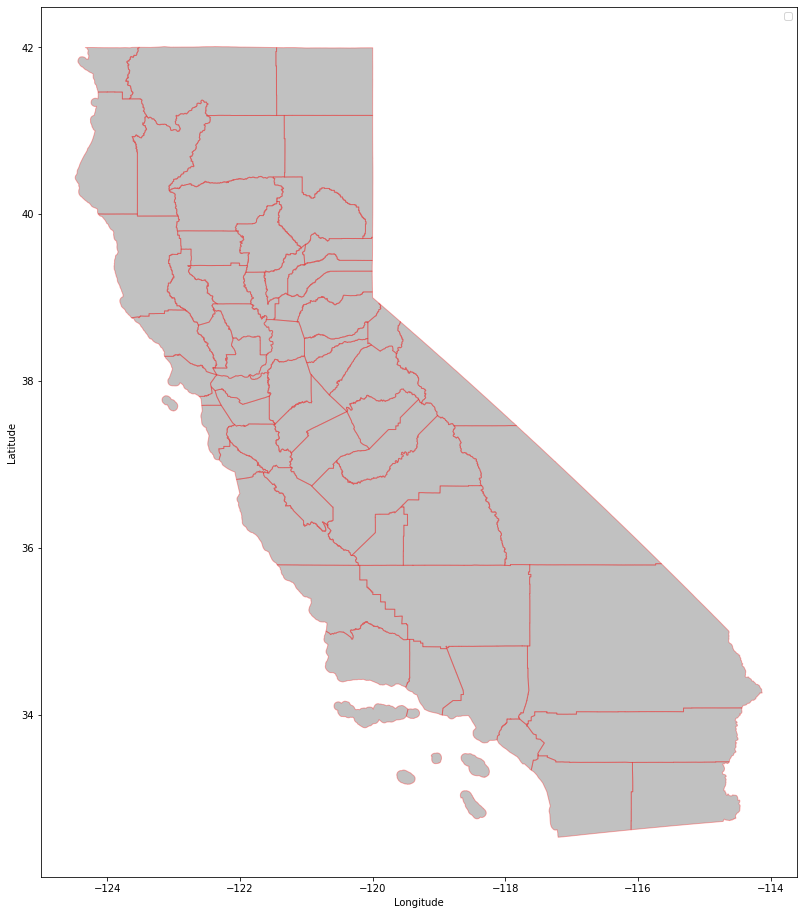

In [139]:
counties_wgs84 = counties.to_crs(epsg=4326, inplace=False)
assert counties_wgs84.crs == 'epsg:4326'

## Plot centroids of each county
fig, ax = plt.subplots(figsize=(18,16))

#plt.scatter(counties_wgs84['Centroid_Longitude'],counties_wgs84['Centroid_Latitude'])
counties_wgs84.plot(ax=ax, color = '#333333', edgecolor='red', alpha = .3)

ax.axis('on') # You can optionally omit the axes

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [141]:
x_range = (-124.848974, -110)
y_range = (30.396308, 45.384358)

W = 1600
H = 800

cvs = ds.Canvas(plot_width=W, plot_height=H,
                x_range=x_range, y_range=y_range)

#agg = cvs.points(stations_df, 'Longitude', 'Latitude')

#img = ds.tf.shade(agg,  cmap = colorcet.rainbow)

county_mask = cvs.polygons(counties_wgs84, geometry = 'geometry')
set_background(shade(county_mask, cmap='#333333', alpha=255), 'black')

ValueError: source must be an instance of spatialpandas.GeoDataFrame or 
spatialpandas.dask.DaskGeoDataFrame.
  Received value of type <class 'geopandas.geodataframe.GeoDataFrame'>

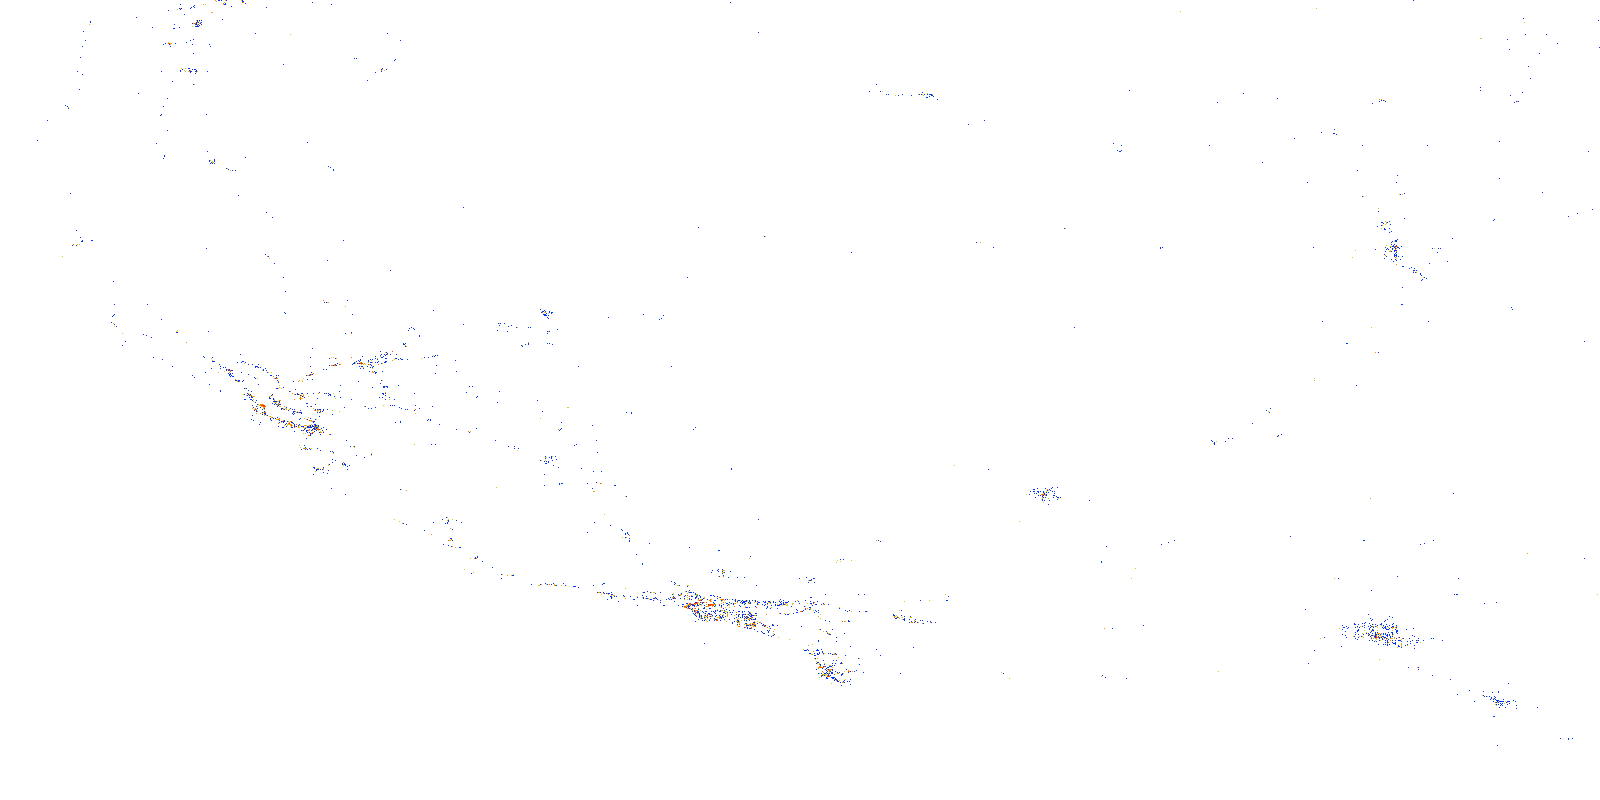

In [115]:
img

In [88]:
stations_raster = cvs.points(stations_df, 'Longitude', 'Latitude')
stations_raster

<xarray.DataArray (Latitude: 800, Longitude: 1600)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
Coordinates:
  * Longitude  (Longitude) float64 -124.8 -124.8 -124.8 ... -110.0 -110.0 -110.0
  * Latitude   (Latitude) float64 24.41 24.44 24.47 24.51 ... 49.31 49.34 49.37